# Video Model Deepfake Detection

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import os
import random
import shutil

def split_dataset(dataset_dir, train_dir, test_dir, split_ratio=0.8):
    # Create train and test directories if they don't exist
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    total_train_imgs = 0
    total_test_imgs = 0

    # Iterate over each class (REAL and FAKE)
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            num_files = len(files)
            num_train = int(num_files * split_ratio)
            random.shuffle(files)

            # Move files to train directory
            for file_name in files[:num_train]:
                src = os.path.join(class_dir, file_name)
                dst = os.path.join(train_dir, class_name, file_name)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copy(src, dst)
                total_train_imgs += 1

            # Move files to test directory
            for file_name in files[num_train:]:
                src = os.path.join(class_dir, file_name)
                dst = os.path.join(test_dir, class_name, file_name)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copy(src, dst)
                total_test_imgs += 1

    return total_train_imgs, total_test_imgs

def count_total_images(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len(files)
    return total

# Define paths
dataset_dir = r"C:\Users\Chithira Binu\OneDrive\Desktop\Python projects\Images"
train_dir = r"C:\Users\Chithira Binu\OneDrive\Desktop\Python projects\Train"
test_dir = r"C:\Users\Chithira Binu\OneDrive\Desktop\Python projects\Test"   

# Split dataset
total_train_imgs, total_test_imgs = split_dataset(dataset_dir, train_dir, test_dir)



In [3]:
# Count total images
total_imgs = count_total_images(dataset_dir)
total_train_imgs = count_total_images(train_dir)
total_test_imgs = count_total_images(test_dir)

print(f"Total images: {total_imgs}")
print(f"Total images in training set: {total_train_imgs}")
print(f"Total images in testing set: {total_test_imgs}")

Total images: 5021
Total images in training set: 4016
Total images in testing set: 1005


In [4]:
# Define Video Deepfake Detection Model
class VideoDeepfakeDetector:
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    def init_model(self): 
        x = Input(shape=(256, 256, 3))  # Adjust input shape as per your image dimensions
        
        # Define your model architecture here
        y = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        y = MaxPooling2D((2, 2))(y)
        y = Conv2D(32, (3, 3), activation='relu', padding='same')(y)
        y = MaxPooling2D((2, 2))(y)
        y = Flatten()(y)
        y = Dense(64, activation='relu')(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)
        
        model = Model(inputs=x, outputs=y)
        model.summary()     

        return model

In [5]:
# Instantiate the VideoDeepfakeDetector model
video_deepfake_detector = VideoDeepfakeDetector()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     8,388,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,393,825 (32.02 MB)

 Trainable params: 8,393,825 (32.02 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Example usage
def train_model(train_dataset_dir):
    # Create data generator for training without validation split
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_dataset_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary'
    )

    # Train the model
    video_deepfake_detector.model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

# Train the model with all the data in the training dataset
train_dataset_dir = r"C:\Users\Chithira Binu\OneDrive\Desktop\Python projects\Train"
train_model(train_dataset_dir)


Found 4015 images belonging to 2 classes.
Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9888 - loss: 0.0250
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - accuracy: 0.9921 - loss: 0.0276
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.9923 - loss: 0.0241
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9906 - loss: 0.0269
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step - accuracy: 0.9928 - loss: 0.0254
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [7]:
# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Chithira Binu\OneDrive\Desktop\Python projects\Test",                   #give directory for test dataset
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model on the test set
test_loss, test_accuracy = video_deepfake_detector.model.evaluate(test_generator)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 1005 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.9715 - loss: 0.0828
Test Loss: 0.07821311056613922
Test Accuracy: 0.9701492786407471


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


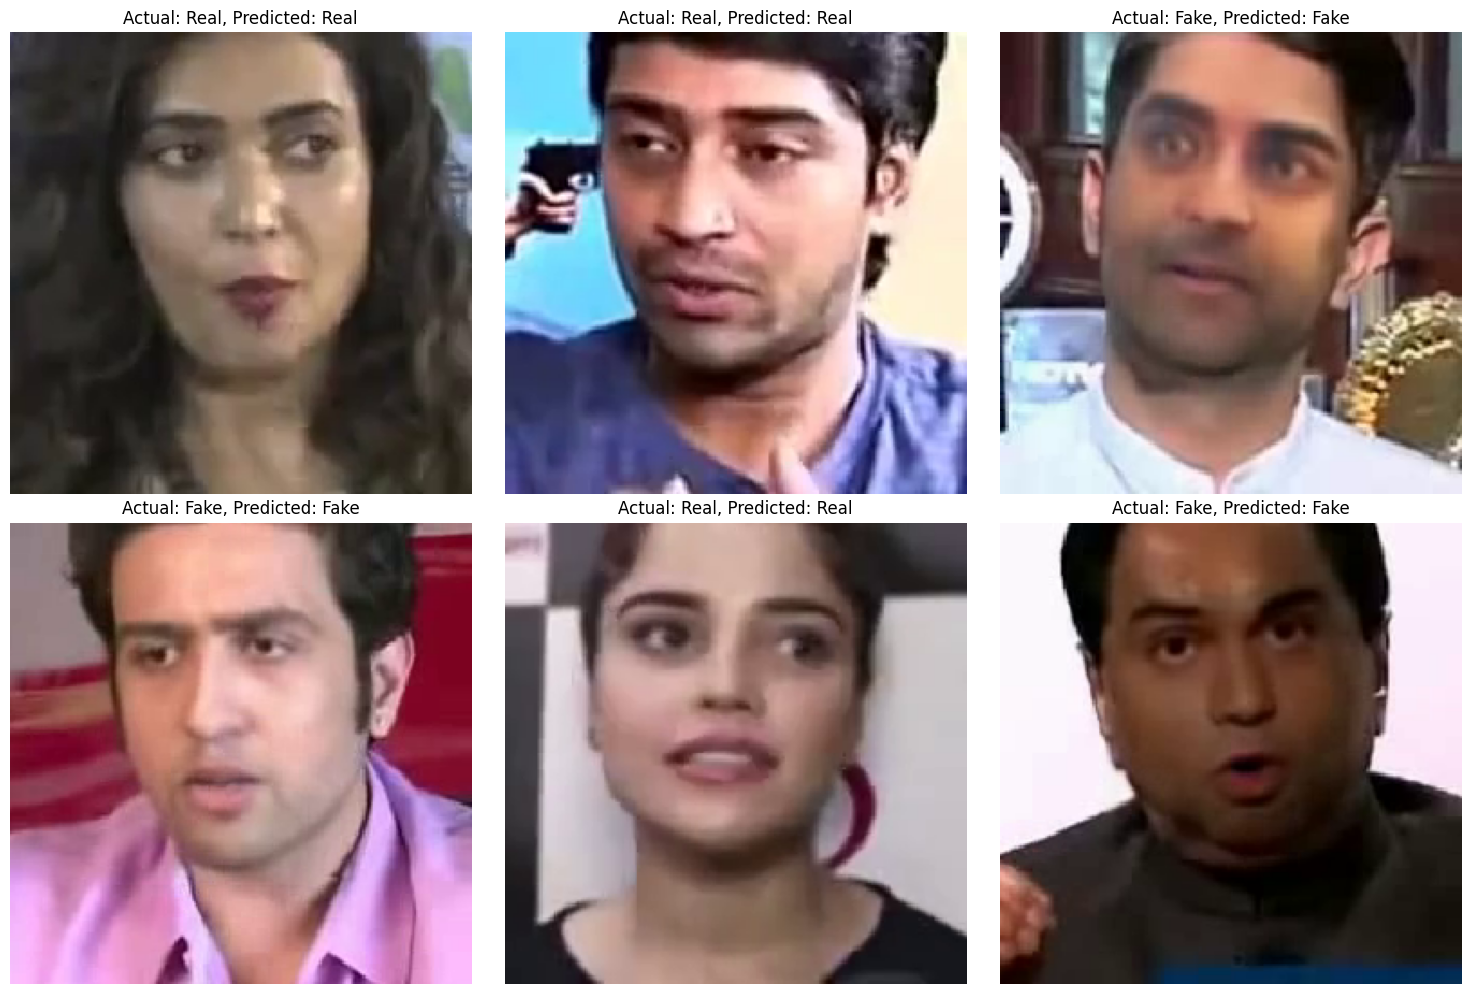

In [8]:
import matplotlib.pyplot as plt

def generate_images(directory, num_images=6):
    images = []
    actual_labels = []
    predicted_labels = []
    
    for _ in range(num_images):
        # List subdirectories (categories)
        categories = os.listdir(directory)
        # Select a random category
        category = np.random.choice(categories)
        # Select a random image from the chosen category
        img_path = np.random.choice(os.listdir(os.path.join(directory, category)))
        
        # Load and preprocess the image for prediction
        img = image.load_img(os.path.join(directory, category, img_path), target_size=(256, 256))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the batch shape
        img_array /= 255.0  # Rescale to [0,1]
        
        # Predict the label
        predicted_label = "Fake" if video_deepfake_detector.model.predict(img_array) < 0.5 else "Real"
        
        # Append the image and labels
        images.append(img)
        actual_labels.append(category)
        predicted_labels.append(predicted_label)
    
    return images, actual_labels, predicted_labels

# Generate images from the test directory
images, actual_labels, predicted_labels = generate_images(test_dir, num_images=6)

# Display the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for ax, img, actual_label, predicted_label in zip(axes, images, actual_labels, predicted_labels):
    ax.imshow(img)
    ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Audio Model Deepfake Detection

In [9]:
import librosa     # audio analysis
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from numpy import loadtxt 
import librosa.display
import matplotlib.pyplot as plt


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [10]:
def preprocess_audio(audio_path, target_sr=22050):
    """
    Preprocesses the audio file (replace with your specific logic).

    Args:
        audio_path (str): Path to the audio file.
        target_sr (int, optional): Target sample rate for resampling. Defaults to 22050.

    Returns:
        np.ndarray: The preprocessed audio waveform.
    """

    # Load audio clip
    y, sr = librosa.load(audio_path)

    # Resample if necessary
    if sr != target_sr:
        y = librosa.effects.resample(y, sr, target_sr)

    # Normalize (replace with normalization logic)
    # y = librosa.util.normalize(y)  # Example normalization
    # Consider normalization techniques like peak normalization, RMS normalization, or z-score normalization

    return y

Plotting MFCC features for two random audio files in Fake folder...


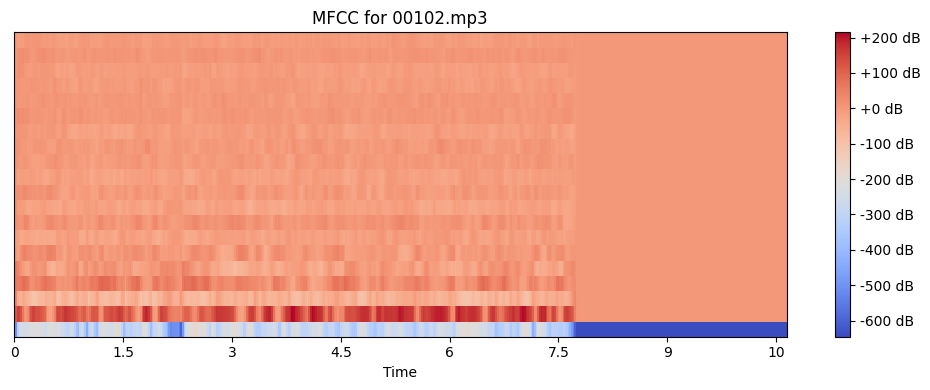

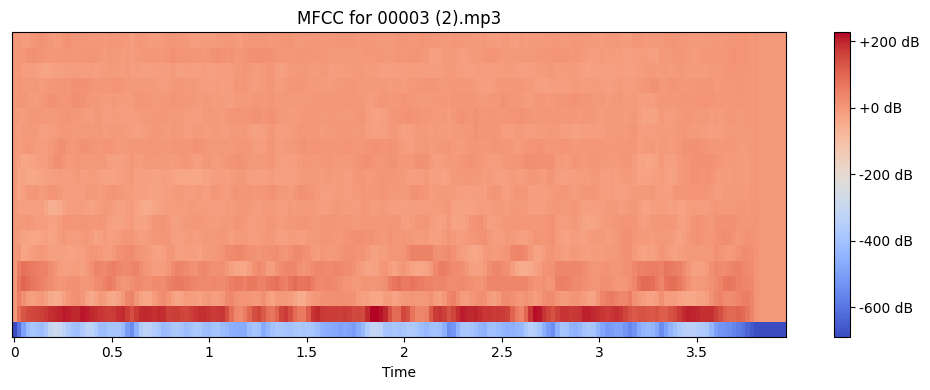

Plotting MFCC features for two random audio files in Real folder...


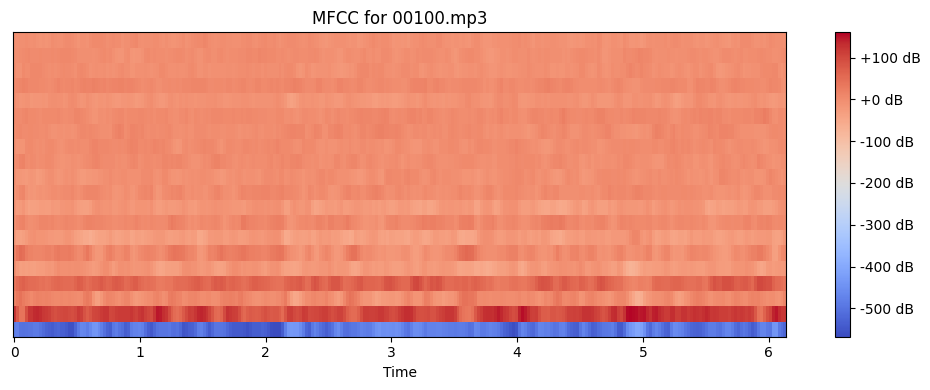

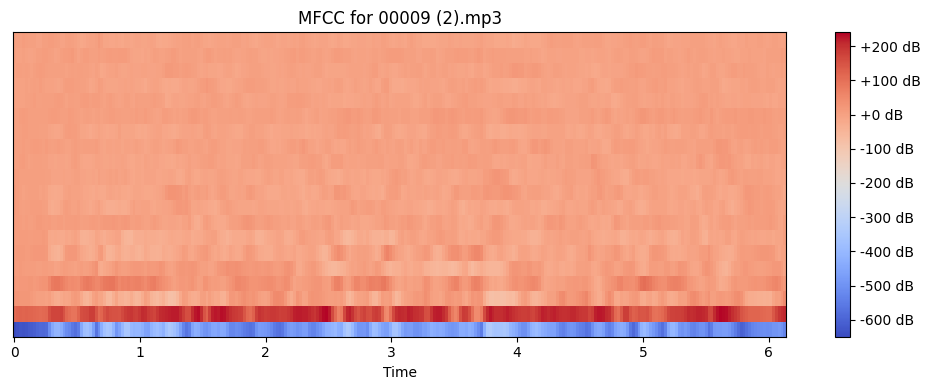

In [12]:
def plot_random_mfcc(audio_folder_path):
    for subfolder in os.listdir(audio_folder_path):
        subfolder_path = os.path.join(audio_folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Plotting MFCC features for two random audio files in {subfolder} folder...")
            # Get list of audio files in the subfolder
            audio_files = [filename for filename in os.listdir(subfolder_path) if filename.endswith(".wav") or filename.endswith(".mp3")]
            # Randomly select two audio files
            selected_audio_files = random.sample(audio_files, 2)
            for filename in selected_audio_files:
                audio_path = os.path.join(subfolder_path, filename)
                # Load audio file and extract MFCC features
                y, sr = librosa.load(audio_path)
                mfccs = librosa.feature.mfcc(y=y, sr=sr)
                # Plot MFCC features
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(mfccs, sr=sr, x_axis='time')
                plt.colorbar(format='%+2.0f dB')
                plt.title(f'MFCC for {filename}')
                plt.tight_layout()
                plt.show()

# Parent folder containing subfolders "REAL" and "FAKE"
parent_folder = r"C:\Users\Chithira Binu\Downloads\extracted_audio"

# Plot MFCC features for two random audio files in each subfolder
plot_random_mfcc(parent_folder)

In [13]:
def extract_features(audio_path, feature_types=['mfcc']):
    """Extracts audio features for an audio clip."""

    # Preprocess audio (replace with your specific logic)
    y = preprocess_audio(audio_path)

    features = []
    for feature_type in feature_types:
        if feature_type == 'mfcc':
            mfccs = librosa.feature.mfcc(y=y, n_mfcc=40)  # Change n_mfcc to 40
            features.append(mfccs.flatten()[:40])  # Only take the first 40 values

        elif feature_type == 'melspectrogram':
            melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=10)  # Change n_mels to 10
            features.append(librosa.power_to_db(melspec, ref=np.max).flatten())

        elif feature_type == 'spectrogram':
            D = librosa.stft(y)
            S = np.abs(librosa.magphase(D))
            features.append(librosa.power_to_db(S, ref=np.max)**2)

    # Combine all features
    combined_features = np.concatenate(features, axis=0)

    return combined_features

In [14]:
def create_csv(audio_folder_path, output_csv_path, feature_types=['mfcc']):
    """Creates a CSV file with audio features and labels from a folder."""

    data = []
    for filename in os.listdir(audio_folder_path):
        if filename.endswith(".wav") or filename.endswith(".mp3"):  # Adjust for supported formats
            audio_path = os.path.join(audio_folder_path, filename)
            features = extract_features(audio_path, feature_types)
            label = 0  # Replace with how you want to assign labels (e.g., manual labeling)

            # Create the DataFrame with features
            feature_names = [f"feature_{i + 1}" for i in range(features.shape[0])]
            df_features = pd.DataFrame(data=[features], columns=feature_names)

            # Insert the audio_filename and label columns
            df_features.insert(0, 'audio_filename', filename)
            df_features.insert(1, 'label', label)

            data.append(df_features)

    # Concatenate all DataFrames and save as CSV
    df = pd.concat(data)
    df.to_csv(output_csv_path, index=False)
    
# Example usage
audio_folder_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\Fake"
output_csv_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\deepfake_audio_features_Fake.csv"

create_csv(audio_folder_path, output_csv_path, feature_types=['mfcc'])

In [15]:
def create_csv(audio_folder_path, output_csv_path, feature_types=['mfcc']):
    """Creates a CSV file with audio features and labels from a folder."""

    data = []
    for filename in os.listdir(audio_folder_path):
        if filename.endswith(".wav") or filename.endswith(".mp3"):  # Adjust for supported formats
            audio_path = os.path.join(audio_folder_path, filename)
            features = extract_features(audio_path, feature_types)
            label = 1  # Replace with how you want to assign labels (e.g., manual labeling)

            # Create the DataFrame with features
            feature_names = [f"feature_{i + 1}" for i in range(features.shape[0])]
            df_features = pd.DataFrame(data=[features], columns=feature_names)

            # Insert the audio_filename and label columns
            df_features.insert(0, 'audio_filename', filename)
            df_features.insert(1, 'label', label)

            data.append(df_features)

    # Concatenate all DataFrames and save as CSV
    df = pd.concat(data)
    df.to_csv(output_csv_path, index=False)
    
# Example usage
audio_folder_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\Real"
output_csv_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\deepfake_audio_features_Real.csv"

create_csv(audio_folder_path, output_csv_path, feature_types=['mfcc'])

In [17]:
file_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\deepfake_audio_features_Real.csv"

df1 = pd.read_csv(file_path)

In [18]:
file_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\deepfake_audio_features_Fake.csv"

df2 = pd.read_csv(file_path)

In [19]:
#Combine Two csv files in combine_df
'''df1 = pd.read_csv('deepfake_audio_features_Real.csv')

df2 = pd.read_csv('deepfake_audio_features_Fake.csv')'''

combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.to_csv('audio_features.csv', index=False)

In [20]:
#load data
data = pd.read_csv('audio_features.csv')

#print(data)
data.head()

audio_filename  label  feature_1  feature_2  feature_3  feature_4  \
0  00001 (2).mp3      1 -423.94504 -401.73517 -404.67465 -404.88657   
1      00001.mp3      1 -309.48196 -306.16653 -321.10318 -327.99590   
2  00002 (2).mp3      1 -326.43990 -314.30060 -329.76764 -346.68152   
3      00002.mp3      1 -386.77817 -361.78530 -365.05118 -339.90390   
4  00003 (2).mp3      1 -419.62370 -406.00320 -394.21506 -360.08950   

   feature_5  feature_6  feature_7  feature_8  ...  feature_31  feature_32  \
0 -401.54610 -397.39862 -394.83100 -397.69560  ...  -242.06673  -276.12164   
1 -344.05737 -333.07980 -321.83777 -310.96475  ...  -344.28833  -345.47156   
2 -375.98962 -396.57236 -363.34482 -358.60464  ...  -301.69260  -305.02567   
3 -253.44260 -194.40440 -176.85349 -185.20190  ...  -256.12985  -262.74664   
4 -358.70206 -388.51140 -428.26640 -450.85230  ...  -267.55328  -301.78772   

   feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  \
0  -248.31850  -252.28369  -272.23975  -267.70483  -256.88928  -238.55770   
1  -358.27457  -365.89166  -372.98215  -375.51800  -337.10028  -311.19330   
2  -321.99133  -337.39040  -360.48172  -403.18716  -458.75650  -460.92258   
3  -269.31815  -268.34198  -273.61264  -255.30736  -239.05617  -215.65523   
4  -372.33572  -395.06010  -407.88650  -421.64954  -402.04718  -358.28543   

   feature_39  feature_40  
0  -221.96170  -236.55525  
1  -327.90760  -354.12110  
2  -397.14760  -372.06772  
3  -199.62741  -209.58170  
4  -345.39706  -343.39062  

[5 rows x 42 columns]

In [21]:
# Drop the audio_filename column
data = data.drop('audio_filename', axis=1)

In [22]:
#Display final dataset
data.head()

label  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      1 -423.94504 -401.73517 -404.67465 -404.88657 -401.54610 -397.39862   
1      1 -309.48196 -306.16653 -321.10318 -327.99590 -344.05737 -333.07980   
2      1 -326.43990 -314.30060 -329.76764 -346.68152 -375.98962 -396.57236   
3      1 -386.77817 -361.78530 -365.05118 -339.90390 -253.44260 -194.40440   
4      1 -419.62370 -406.00320 -394.21506 -360.08950 -358.70206 -388.51140   

   feature_7  feature_8  feature_9  ...  feature_31  feature_32  feature_33  \
0 -394.83100 -397.69560 -402.36340  ...  -242.06673  -276.12164  -248.31850   
1 -321.83777 -310.96475 -317.14188  ...  -344.28833  -345.47156  -358.27457   
2 -363.34482 -358.60464 -364.93115  ...  -301.69260  -305.02567  -321.99133   
3 -176.85349 -185.20190 -205.37341  ...  -256.12985  -262.74664  -269.31815   
4 -428.26640 -450.85230 -473.80048  ...  -267.55328  -301.78772  -372.33572   

   feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  \
0  -252.28369  -272.23975  -267.70483  -256.88928  -238.55770  -221.96170   
1  -365.89166  -372.98215  -375.51800  -337.10028  -311.19330  -327.90760   
2  -337.39040  -360.48172  -403.18716  -458.75650  -460.92258  -397.14760   
3  -268.34198  -273.61264  -255.30736  -239.05617  -215.65523  -199.62741   
4  -395.06010  -407.88650  -421.64954  -402.04718  -358.28543  -345.39706   

   feature_40  
0  -236.55525  
1  -354.12110  
2  -372.06772  
3  -209.58170  
4  -343.39062  

[5 rows x 41 columns]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation, Input
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size=0.2, random_state=42)

# Reshape the input data for CNN
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with one neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Fit the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

# Step 4: Predict values using the trained model
predictions = model.predict(X_test)

# Optionally, you may want to evaluate the performance of your model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5501 - loss: 17.2499 - val_accuracy: 0.7750 - val_loss: 0.8789
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6938 - loss: 3.8756 - val_accuracy: 0.8125 - val_loss: 0.6971
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7221 - loss: 1.4909 - val_accuracy: 0.9000 - val_loss: 0.3401
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7764 - loss: 0.6960 - val_accuracy: 0.8625 - val_loss: 0.2442
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8606 - loss: 0.3603 - val_accuracy: 0.8875 - val_loss: 0.3792
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4299 - val_accuracy: 0.8750 - val_loss: 0.2048
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8860 - loss: 0.3076 - val_accuracy: 0.9750 - val_loss: 0.1893
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8401 - loss: 0.3337 - val_accuracy: 0.9375 -

In [24]:
# Step 4: Predict values using the trained model
predictions = model.predict(X_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0212 
Test Loss: 0.027952566742897034, Test Accuracy: 0.9800000190734863


In [25]:
# Make predictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [26]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Ensure both y_pred_binary and y_test are 1-dimensional
y_pred_binary = y_pred_binary.flatten()
y_test = y_test.values.flatten()  # Extract NumPy array and then flatten it

# Evaluate accuracy
accuracy = np.mean(y_pred_binary == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.98


In [27]:
# Print summaries for the first 5 cases
for i in range(7):
    print("Case", i+1)
    print("Predicted Label:", y_pred_binary[i])
    print("Actual Label:", y_test[i])
    print()  # Empty line for separation

Case 1
Predicted Label: 0
Actual Label: 0

Case 2
Predicted Label: 1
Actual Label: 1

Case 3
Predicted Label: 0
Actual Label: 0

Case 4
Predicted Label: 1
Actual Label: 1

Case 5
Predicted Label: 1
Actual Label: 1

Case 6
Predicted Label: 0
Actual Label: 0

Case 7
Predicted Label: 0
Actual Label: 0



In [28]:
# Save the trained model
model.save('audio_detection_model.h5')
print('model saved')

model saved


In [40]:
import librosa
from IPython.display import Audio

# Replace 'audio_file_path' with the path to your audio file
audio_file_path =r"C:\Users\Chithira Binu\Downloads\extracted_audio\Fake\00075 (3).mp3"
# Load the audio file and its sample rate
audio, sr = librosa.load(audio_file_path, sr=None)

# Play the audio
Audio(data=audio, rate=sr)

In [42]:
from tensorflow.keras.models import load_model
import librosa

# Load the trained model
model = load_model('audio_detection_model.h5')

# Define a function to preprocess audio and extract features
def preprocess_and_extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)
    
    # Extract features
    features = extract_features(y)
    
    return features

# Define a function to extract features from audio
def extract_features(audio):
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, n_mfcc=40)
    features = mfccs.flatten()[:40]  # Only take the first 40 values
    
    return features

# Replace 'audio_file_path' with the path to your audio file
audio_file_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\Fake\00075 (3).mp3"

# Preprocess audio and extract features
audio_features = preprocess_and_extract_features(audio_file_path)

# Reshape features to match the input shape of the model
audio_features = audio_features.reshape(1, -1)

# Predict using the trained model
prediction = model.predict(audio_features)

# Convert prediction to a human-readable label
# Use the actual threshold used during training
threshold = 0.3  # Adjust this value based on the actual threshold used during training
label = "Real" if prediction[0][0] < threshold else "Fake"

print("Prediction:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Fake


In [35]:
import librosa
from IPython.display import Audio

# Replace 'audio_file_path' with the path to your audio file
audio_file_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\Real\0002r.mp3"

# Load the audio file and its sample rate
audio, sr = librosa.load(audio_file_path, sr=None)

# Play the audio
Audio(data=audio, rate=sr)

In [36]:
from tensorflow.keras.models import load_model
import librosa

# Load the trained model
model = load_model('audio_detection_model.h5')

# Define a function to preprocess audio and extract features
def preprocess_and_extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)
    
    # Extract features
    features = extract_features(y)
    
    return features

# Define a function to extract features from audio
def extract_features(audio):
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, n_mfcc=40)
    features = mfccs.flatten()[:40]  # Only take the first 40 values
    
    return features

# Replace 'audio_file_path' with the path to your audio file
audio_file_path = r"C:\Users\Chithira Binu\Downloads\extracted_audio\Real\0002r.mp3"

# Preprocess audio and extract features
audio_features = preprocess_and_extract_features(audio_file_path)

# Reshape features to match the input shape of the model
audio_features = audio_features.reshape(1, -1)

# Predict using the trained model
prediction = model.predict(audio_features)

# Convert prediction to a human-readable label
label = "Real" if prediction[0][0] < 0.5 else "Fake"

print("Prediction:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Real
